In [127]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import rotate
from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.metrics import peak_signal_noise_ratio as PSNR
from scipy import signal


def gaussian_filter(n_rows, n_cols, stdv):
    """
    Returns a 2d Gaussian image filter.
    """
    g_r = signal.windows.gaussian(n_rows, stdv)
    g_c = signal.windows.gaussian(n_cols, stdv)

    G = np.outer(g_r, g_c)

    return G/np.max(G)

plt.gray()
lena= rgb2gray(imread('lena.tiff'))
frequnoisy = imread('frequnoisy.tif').astype(np.float64)/255

<Figure size 640x480 with 0 Axes>

# 2 - Fourier Analysis

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


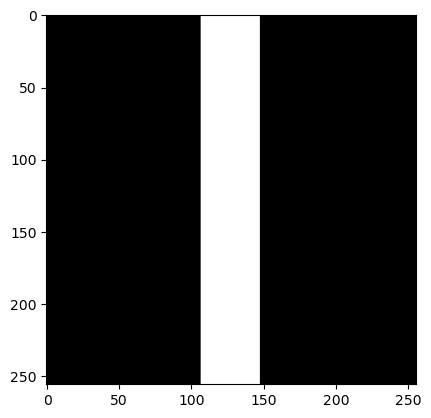

In [72]:
f = np.zeros((256,256))
f[:,107:148] = 1  # image with white rectangle

plt.imshow(f)
print(f)

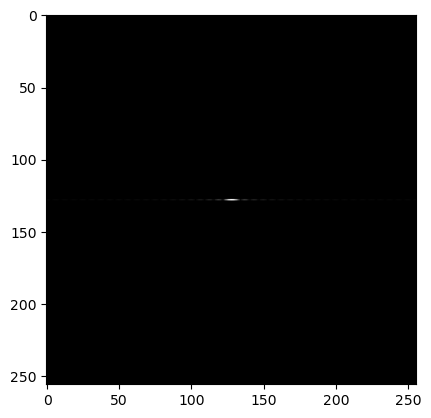

In [73]:
# (1)

fourier_transformed_image = np.fft.fft2(f)  # this generates points with COMPLEX (imaginary values)
#e.g.  [ ... 8802.41144993-432.43474491j -10055.9412558 +246.85950184j]
# print(fourier_transformed_image)

# thus, get the magnitude of the sinusoids via taking absolute value (  np.abs()  )
# since the coordinate system has (0,0) in the top left, we shift these axes/origin towards the center (  np.fft.fftshift()   )
plt.imshow(np.abs(np.fft.fftshift(fourier_transformed_image)))  # we shift the image
plt.show()

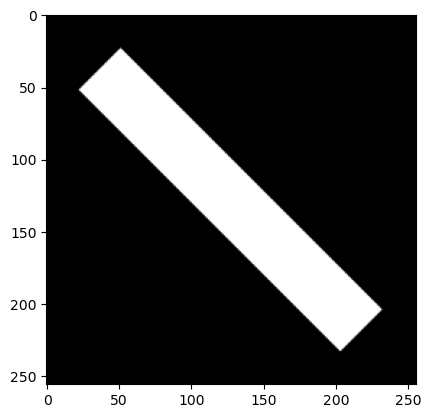

In [74]:
# (2) Rotate the image
angle = 45  # units: deg, ccw direction
rotated_image = rotate(f, angle)

plt.imshow(rotated_image)
plt.show()

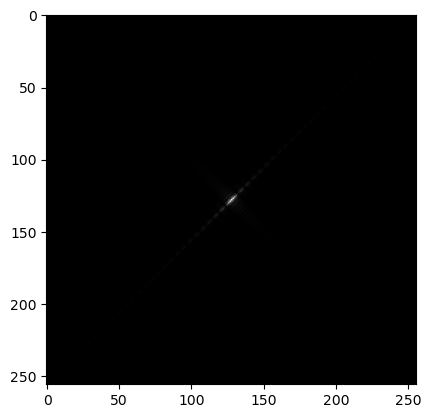

In [75]:
rotated_fourier_transformed_image = np.fft.fft2(rotated_image)
plt.imshow(np.abs(np.fft.fftshift(rotated_fourier_transformed_image)))
# print(rotated_fourier_transformed_image)
plt.show()

In [76]:
lena

array([[0.60802863, 0.60802863, 0.60779059, ..., 0.64137412, 0.57998235,
        0.46985725],
       [0.60802863, 0.60802863, 0.60779059, ..., 0.64137412, 0.57998235,
        0.46985725],
       [0.60802863, 0.60802863, 0.60779059, ..., 0.64137412, 0.57998235,
        0.46985725],
       ...,
       [0.13746353, 0.13746353, 0.16881412, ..., 0.37271804, 0.35559529,
        0.34377725],
       [0.14617059, 0.14617059, 0.18730588, ..., 0.36788784, 0.37292549,
        0.38467529],
       [0.14617059, 0.14617059, 0.18730588, ..., 0.36788784, 0.37292549,
        0.38467529]])

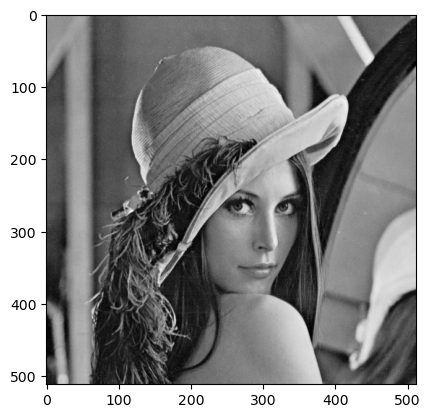

In [77]:
plt.imshow(lena)

In [78]:
lena.shape

(512, 512)

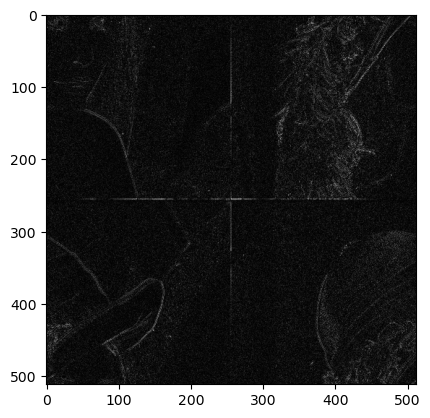

In [79]:
lena_fourier = np.fft.fft2(lena)
lena_fourier = np.fft.fftshift(lena_fourier)
magnitude = np.abs(lena_fourier)
phase = lena_fourier / magnitude
# plt.imshow(magnitude)
inv_magnitude = np.fft.ifft2(magnitude)
inv_magnitude = np.fft.ifftshift(inv_magnitude)
inv_magnitude = np.log(np.abs(inv_magnitude))
inv_magnitude
# plt.imshow(inv_magnitude)

inv_phase = np.fft.ifft2(phase)
inv_phase = np.fft.ifftshift(inv_phase)
inv_phase = np.abs(inv_phase)
plt.imshow(inv_phase)

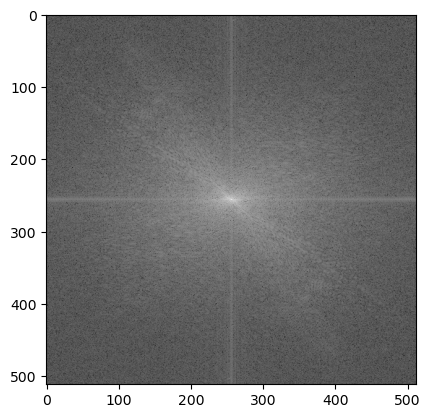

In [180]:
# Compute the 2D Fourier Transform of the image
lena_fourier = np.fft.fft2(lena)
lena_fourier_shifted = np.fft.fftshift(lena_fourier)

# Get the magnitude and phase
magnitude = np.abs(lena_fourier_shifted)
phase = lena_fourier_shifted / magnitude

# Inverse shift and Inverse Fourier Transform
inv_magnitude = np.fft.ifft2(np.fft.ifftshift(magnitude))
inv_magnitude = np.log(np.abs(inv_magnitude))  # Only real part is useful

# Inverse shift and Inverse Fourier Transform
inv_phase = np.fft.ifft2(np.fft.ifftshift(phase))
inv_phase = np.abs(inv_phase)  # Only real part is useful

plt.imshow(np.log(magnitude))
plt.show()


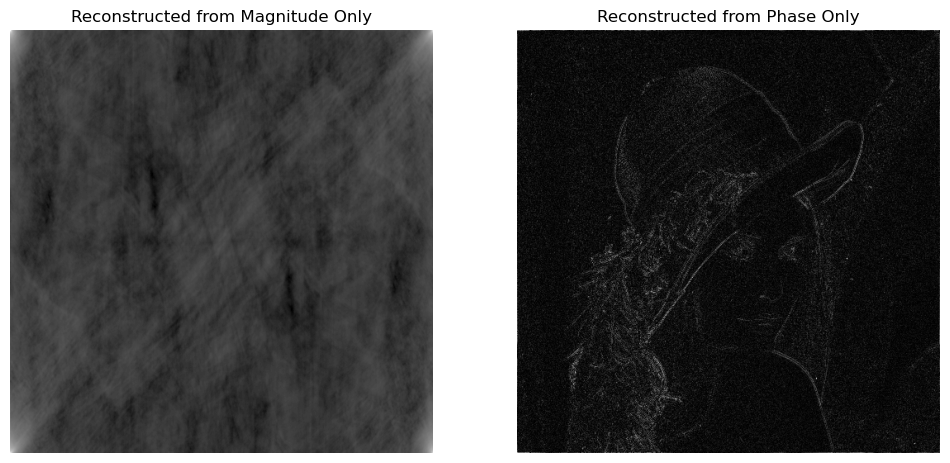

In [181]:
# Plotting results
plt.figure(figsize=(12, 6))

# Magnitude-only reconstruction
plt.subplot(1, 2, 1)
plt.imshow(inv_magnitude, cmap='gray')
plt.title('Reconstructed from Magnitude Only')
plt.axis('off')

# Phase-only reconstruction
plt.subplot(1, 2, 2)
plt.imshow(inv_phase, cmap='gray')
plt.title('Reconstructed from Phase Only')
plt.axis('off')

plt.show()

[[21.7464398 +0.00000000e+00j 11.3946833 +3.63258550e-17j
   6.25509049+4.33354823e-17j ...  4.51623729+3.11144180e-17j
   6.25509049-4.85920519e-17j 11.3946833 -3.87691874e-17j]
 [13.5299913 -6.07153217e-17j  9.22444925+4.52061484e-17j
   5.69176895+3.32084089e-17j ...  4.68702886+4.72563169e-17j
   6.62373974-1.00999665e-17j 10.24342105-1.14879253e-17j]
 [ 9.03933235-8.59306277e-17j  7.26049242+9.74846969e-18j
   5.44219596-1.07267795e-17j ...  5.19730408-2.73919612e-17j
   6.51976029-2.34862102e-17j  7.87806009-4.75919580e-17j]
 ...
 [ 6.83578436+1.76153062e-16j  6.18771241-3.77400966e-17j
   5.74252452-1.20188445e-16j ...  3.97047007+9.96416270e-17j
   4.90994628+1.00017784e-16j  5.90450443+7.23201191e-17j]
 [ 9.03933235+2.51245968e-16j  7.87806009+1.72894893e-16j
   6.51976029-6.85707504e-17j ...  4.14239618-1.57964083e-16j
   5.44219596+5.91181939e-18j  7.26049242+2.51945044e-16j]
 [13.5299913 +8.13731908e-17j 10.24342105-1.68566628e-16j
   6.62373974+6.20575018e-17j ...  4.22406

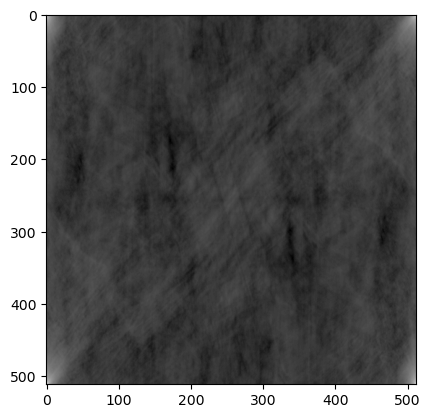

In [87]:
# (5 and 6)
lena_fourier = np.fft.fft2(lena)
lena_fourier = np.fft.fftshift(lena_fourier)

lena_fourier_amplitude = np.abs(lena_fourier)
lena_fourier_phase_complex = lena_fourier / lena_fourier_amplitude  # angle in form of complex number

inv_lena_amplitude = np.fft.ifft2(np.fft.ifftshift(lena_fourier_amplitude))  # need to shift signal#  back
print(inv_lena_amplitude)
inv_lena_amplitude = np.abs(inv_lena_amplitude)
plt.imshow(np.log(inv_lena_amplitude))
plt.show()

# lena_fourier_phase = lena

# print(lena_fourier_phase[5][5])
# print(np.angle(lena_fourier_phase_div[5][5]))


# 3 - Noise Reduction in the Frequency Domain

## Q7

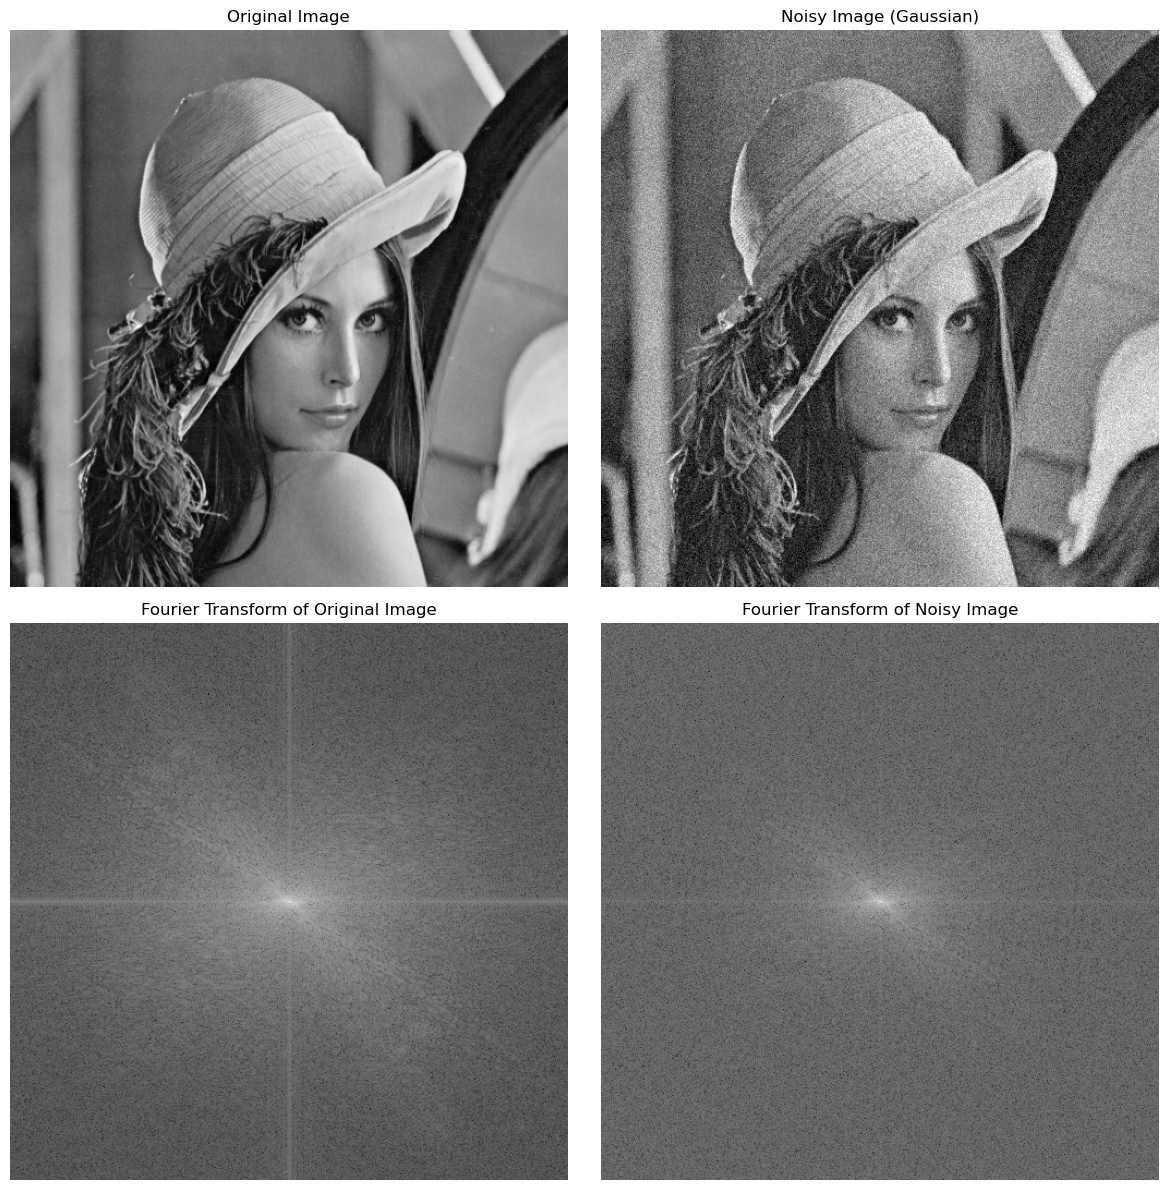

In [101]:
from skimage.util import random_noise
from numpy.fft import fftshift, fft2

lena_gaussian_noise = random_noise(lena, mode="gaussian", mean=0, var=0.005)
lena_fourier = fftshift(fft2(lena))
fourier_lena_noise = fftshift(fft2(lena_gaussian_noise))

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.imshow(lena)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(lena_gaussian_noise)
plt.title("Noisy Image (Gaussian)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(np.log(np.abs(lena_fourier)))
plt.title("Fourier Transform of Original Image")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(np.log(np.abs(fourier_lena_noise)))
plt.title("Fourier Transform of Noisy Image")
plt.axis('off')

plt.tight_layout()
plt.show()


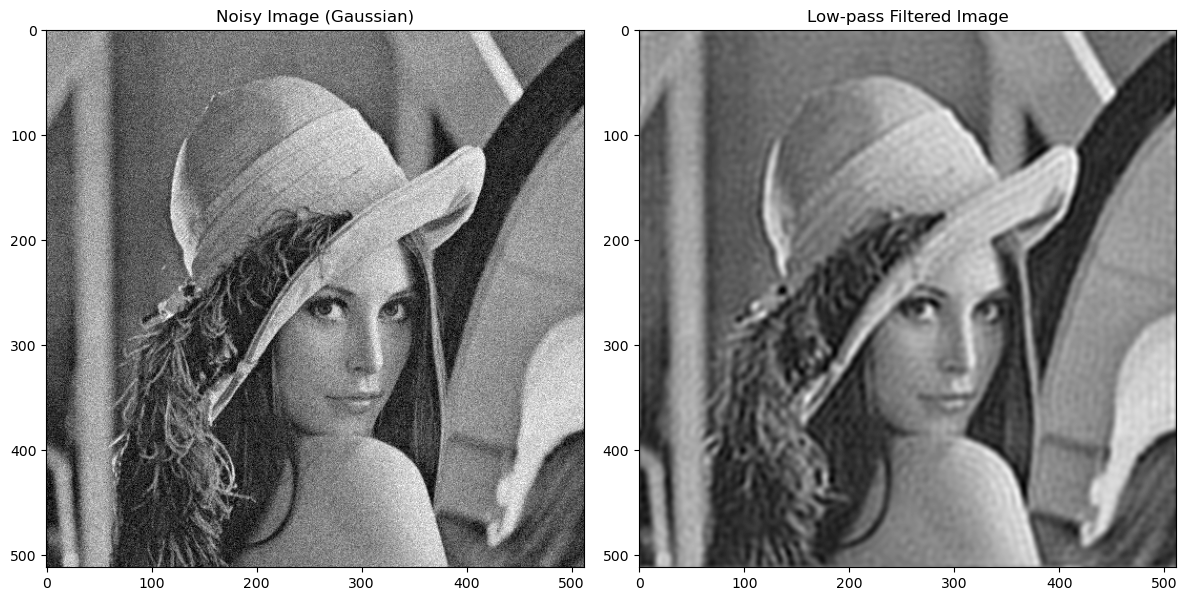

27.469327077531837


In [116]:
# 8 and 9
from numpy.fft import ifftshift, ifft2
from skimage.morphology import disk

def PSNR(f,g):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))

# === Generate Low-pass filter (h_freq) ===
r = 60
image_size = (512, 512)  # (height, width)
h = disk(r)

h_freq = np.zeros(image_size)
h_freq[image_size[0] // 2 - r: image_size[0] // 2 + r + 1, image_size[1]//2 - r: image_size[1]//2 + r + 1] = h

# === Apply filter ===
fourier_filtered_lena = h_freq * fourier_lena_noise
# plt.imshow(np.log(np.abs(fourier_filtered_lena)))

filtered_lena = np.abs(ifft2(ifftshift(fourier_filtered_lena)))

# === Plot images ===

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Noisy Image (Gaussian)")
plt.imshow(lena_gaussian_noise)
plt.subplot(1, 2, 2)
plt.title("Low-pass Filtered Image")
plt.imshow(filtered_lena)
plt.tight_layout()
plt.show()

print(PSNR(filtered_lena, lena))

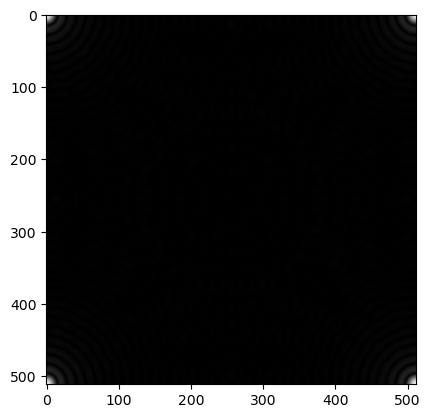

In [38]:
plt.imshow(np.log(np.abs(ifft2(ifftshift(h_freq)))+1))

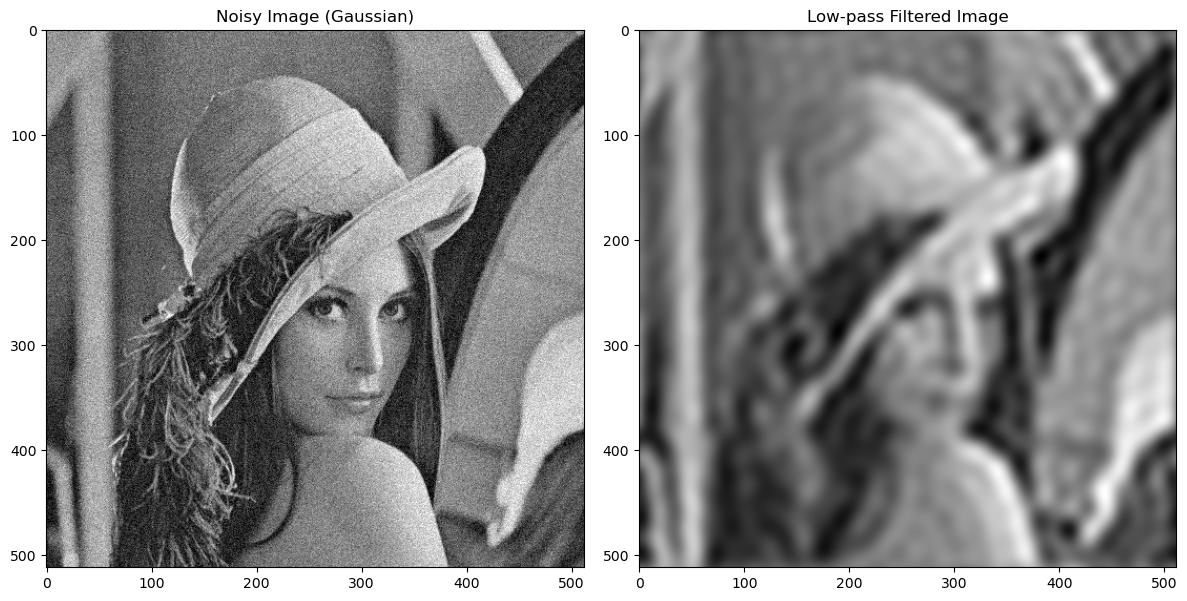

22.509848065425523


In [117]:
# 10 and 11

# === Generate Low-pass filter (h_freq) ===
r = 20
image_size = (512, 512)  # (height, width)
h = disk(r)

h_freq = np.zeros(image_size)
h_freq[image_size[0] // 2 - r: image_size[0] // 2 + r + 1, image_size[1]//2 - r: image_size[1]//2 + r + 1] = h

# === Apply filter ===
fourier_filtered_lena = h_freq * fourier_lena_noise
filtered_lena = np.abs(ifft2(ifftshift(fourier_filtered_lena)))

# === Plot images ===

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Noisy Image (Gaussian)")
plt.imshow(lena_gaussian_noise)
plt.subplot(1, 2, 2)
plt.title("Low-pass Filtered Image")
plt.imshow(filtered_lena)
plt.tight_layout()
plt.show()

print(PSNR(filtered_lena, lena))

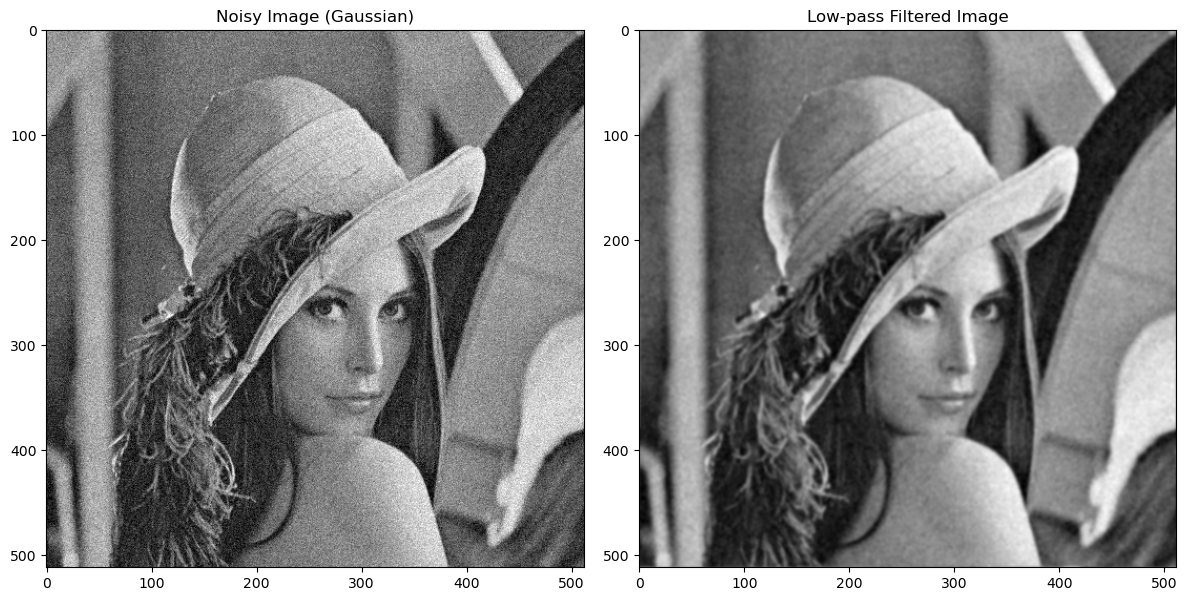

29.228991920679043


In [139]:
# 12

# === Generate Low-pass Gaussian filter ===
image_size = (512, 512)  # (height, width)
gaussian_filter_image = gaussian_filter(*image_size, 60)
# plt.imshow(gaussian_filter_image)

# === Apply filter ===
fourier_filtered_lena = gaussian_filter_image * fourier_lena_noise
filtered_lena = np.abs(ifft2(ifftshift(fourier_filtered_lena)))

# === Plot images ===
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Noisy Image (Gaussian)")
plt.imshow(lena_gaussian_noise)
plt.subplot(1, 2, 2)
plt.title("Low-pass Filtered Image")
plt.imshow(filtered_lena)
plt.tight_layout()
plt.show()

print(PSNR(filtered_lena, lena))

# 4 - Filter Design

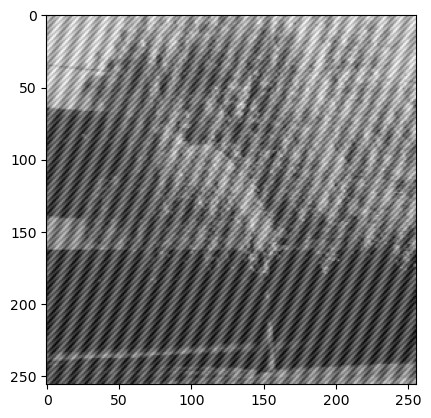

In [140]:
plt.imshow(frequnoisy)
plt.show()

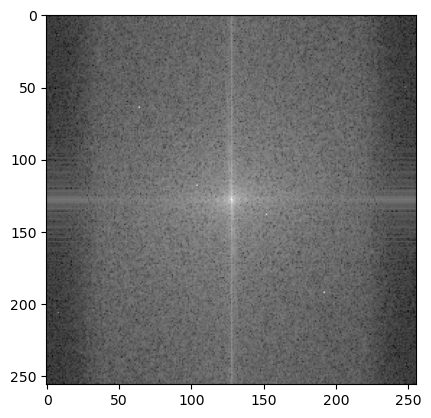

[29859.94901960784, 4116.720136817314, 4116.720136817314, 4110.746169955326, 4110.746169955326, 4077.0696460731438, 4077.0696460731438, 2578.628057879787, 2578.628057879787, 1473.4348610482634, 1473.4348610482632, 1325.839068281188, 1325.839068281188, 930.15160357266, 930.15160357266, 882.878325459441, 882.8783254594409, 853.8424138718481, 853.8424138718481, 772.7373936297593, 772.7373936297593, 762.8200884683295, 762.8200884683295, 747.4410167068332, 747.4410167068332, 713.8309856290012, 713.8309856290012, 581.7961691684424, 581.7961691684421, 524.2162956802579, 524.2162956802579, 461.9771992099797, 461.97719920997963, 438.1459260409588, 438.1459260409588, 437.04023961700085, 437.04023961700085, 398.29511978539256, 398.2951197853925, 372.9064780229507, 372.9064780229507, 357.9151432820254, 357.9151432820254, 355.0341828751792, 355.03418287517917, 349.435196554437, 349.43519655443697, 348.54913678065265, 348.54913678065253, 326.8075075178887, 326.8075075178887, 324.568886237829, 324.56

In [173]:
fourier_frequnoisy = fftshift(fft2(frequnoisy))
mag_frequnoisy = np.abs(fourier_frequnoisy)
plt.imshow(np.log(np.abs(fourier_frequnoisy)))
plt.show()

max_freqs, location = np.max(mag_frequnoisy), np.argmax(mag_frequnoisy)

frequency_intensities = sorted(mag_frequnoisy.flatten(), reverse=True)
print(frequency_intensities)
# coords_y = location // fourier_frequnoisy.shape[0]
# coords_x = location % fourier_frequnoisy.shape[0]
print(max_freqs, location)
print(np.abs(fourier_frequnoisy))

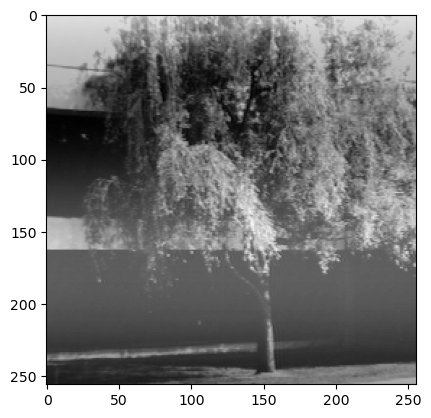

In [175]:
filtered_fourier_frequnoisy = fourier_frequnoisy
for y in range(len(filtered_fourier_frequnoisy)):
    for x in range(len(filtered_fourier_frequnoisy[0])):
        if 4000 < np.abs(filtered_fourier_frequnoisy[y][x]) < 5000:
            filtered_fourier_frequnoisy[y][x] = 0

# plt.imshow(np.log(np.abs(filtered_fourier_frequnoisy)))

result = ifft2(ifftshift(filtered_fourier_frequnoisy))
plt.imshow(np.abs(result))
plt.show()
